<a href="https://colab.research.google.com/github/Sineme01/House-Rate-Predictor/blob/main/House_Rate_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Load Data**


**Name**      : **Anand Kumar**

**Roll        :   2001CB07**

**Institute   :   Indian Institute Of Technology Patna.**

**House Rate Prediction**

**Data is taken from Kaggle.**

**Description :** A prediction system is used in this project to estimate the house's selling price based on various features. Two files, train, and test are provided and the price of the test data is to be estimated. Two files, train, and test are provided and the price of the test data is to be estimated.

First lets import all the libraries that will be used to load train and test datasets and data manipulation.

In [1]:
# Import libraries

# Pandas
import pandas as pd
from pandas import Series,DataFrame

# Numpy and Matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading train and test data

In [3]:
# Get Data in Dataframe
X = pd.read_csv('/content/drive/MyDrive/CS_INNOVATION_LAB/house_train_.csv')
y = pd.read_csv('/content/drive/MyDrive/CS_INNOVATION_LAB/house_test_.csv')

Preview of train and test data

In [4]:
# head() shows the first 5 rows of the data
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


There are 1460 entries in the train data set and 1459 entries in test data set. The data contains some NaN values too.

In [5]:
id = pd.DataFrame()
id['id']=y.Id
print(id)

        id
0     1461
1     1462
2     1463
3     1464
4     1465
...    ...
1454  2915
1455  2916
1456  2917
1457  2918
1458  2919

[1459 rows x 1 columns]


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**2. Data Manipulation and Visualization**

Lets check for NaN (null) values in the data

In [7]:
X.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Lets check for the mean, standard deviation for Sales price

In [8]:
X['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Sales price is right skewed. So, we perform log transformation so that the skewness is nearly zero.

Skew is: 1.8828757597682129


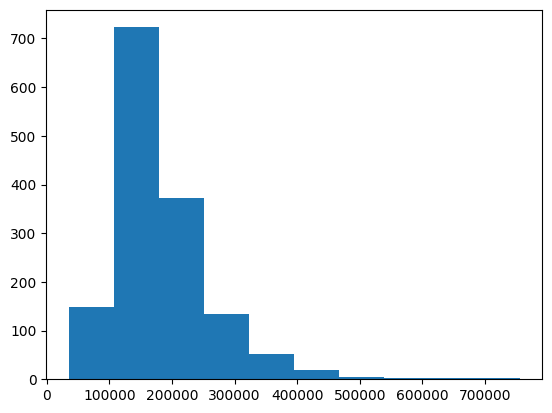

Skew is: 0.12133506220520406


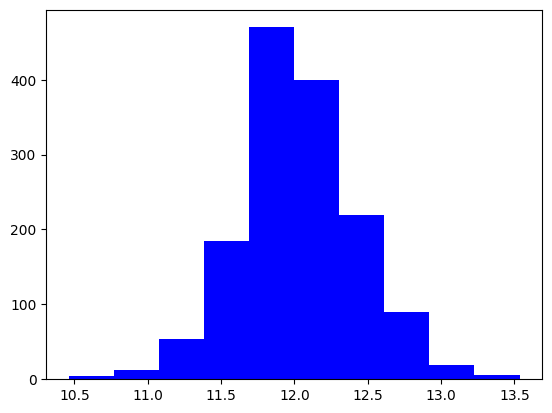

In [9]:
# Determining the Skewness of data
print ("Skew is:", X.SalePrice.skew())

plt.hist(X.SalePrice)
plt.show()

# After log transformation of the data it looks much more center aligned
X['Skewed_SP'] = np.log(X['SalePrice'])
y['Skewed_SP']=X['Skewed_SP']
print ("Skew is:", X['Skewed_SP'].skew())
plt.hist(X['Skewed_SP'], color='blue')
plt.show()

Lets analyze the numeric features using the numpy library

In [10]:
numerical_features = X.select_dtypes(include=[np.number])
numerical_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
Skewed_SP        float64
dtype: object

In [11]:
# Then we will try to find the corretation between the feature and target
corr = numerical_features.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])
print (corr['SalePrice'].sort_values(ascending=False)[:], '\n')


SalePrice      1.000000
Skewed_SP      0.948374
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64
SalePrice        1.000000
Skewed_SP        0.948374
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea

In [12]:
numerical_features

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Skewed_SP
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,61,0,0,0,0,0,2,2008,208500,12.247694
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,0,0,5,2007,181500,12.109011
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,42,0,0,0,0,0,9,2008,223500,12.317167
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,35,272,0,0,0,0,2,2006,140000,11.849398
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,84,0,0,0,0,0,12,2008,250000,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,40,0,0,0,0,0,8,2007,175000,12.072541
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,0,0,0,2,2010,210000,12.254863
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,60,0,0,0,0,2500,5,2010,266500,12.493130
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,112,0,0,0,0,4,2010,142125,11.864462


We will analyze the features in their descending of correlation with sales price

In [13]:
X.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [14]:
#Creating a pivot table
quality_pivot = X.pivot_table(index='OverallQual',values='SalePrice',aggfunc=np.median)
quality_pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


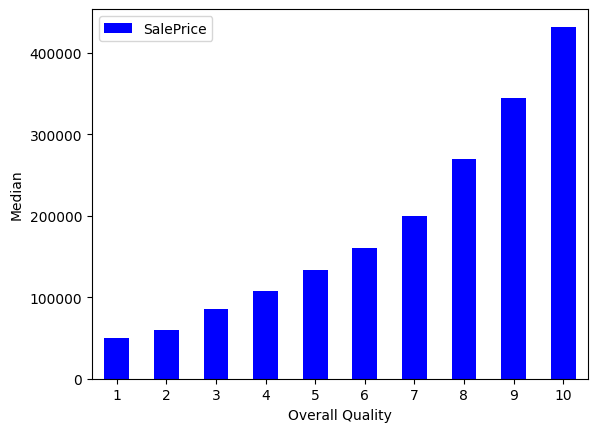

In [15]:
quality_pivot.plot(kind='bar',color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median')
plt.xticks(rotation=0)
plt.show()

The median Selling Price of house can be seen to be strictly increasing as the Overall Quality is increasing.

<Axes: xlabel='GrLivArea', ylabel='Skewed_SP'>

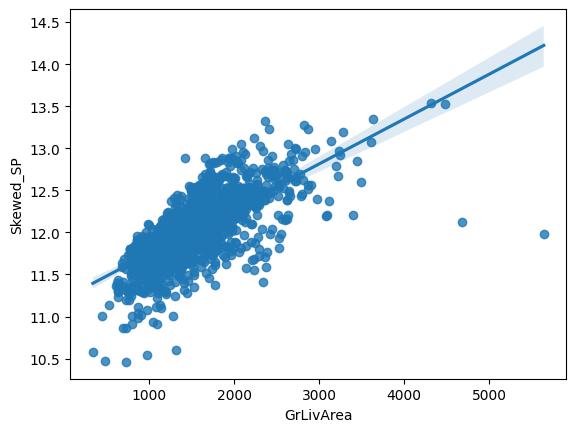

In [16]:
sns.regplot(x='GrLivArea',y='Skewed_SP',data=X)

SalePrice increases as the GrLivArea increases. We will also get rid of the outliers which severely affect the prediction of the survival rate.

<Axes: xlabel='GrLivArea', ylabel='Skewed_SP'>

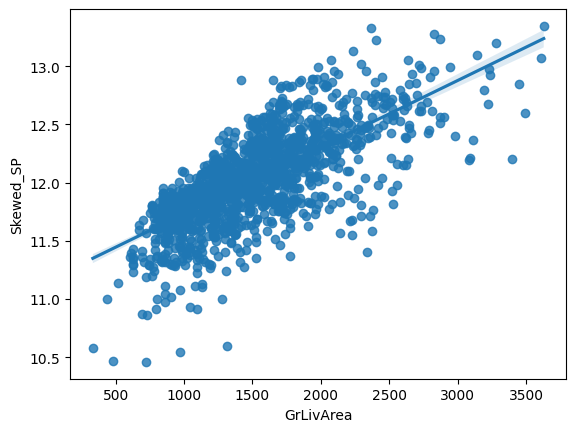

In [17]:
#Removing outliers
X = X[X['GrLivArea'] < 4000]
sns.regplot(x='GrLivArea',y='Skewed_SP',data=X)

<Axes: xlabel='GarageArea', ylabel='Skewed_SP'>

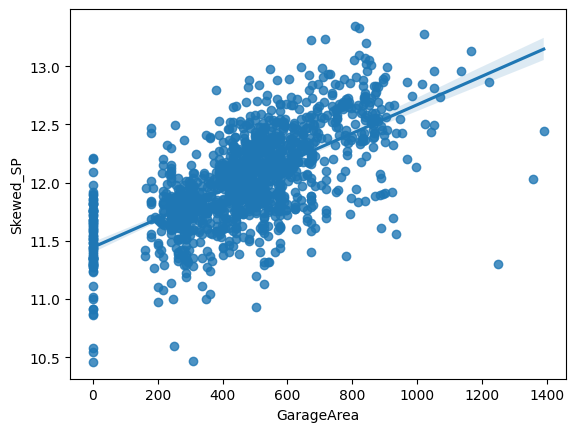

In [18]:
sns.regplot(x='GarageArea',y='Skewed_SP',data=X)

GarageArea and SalePrice are directly proportional.

We will again get rid of the outliers.

<Axes: xlabel='GarageArea', ylabel='Skewed_SP'>

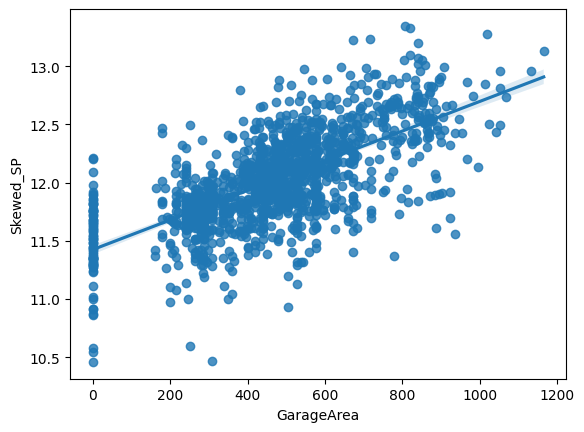

In [19]:
#Removing outliers
X = X[X['GarageArea'] < 1200]
sns.regplot(x='GarageArea',y='Skewed_SP',data=X)

In [20]:
#Removing the null values
nulls = pd.DataFrame(X.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
PoolQC,1447
MiscFeature,1399
Alley,1361
Fence,1172
FireplaceQu,689
LotFrontage,258
GarageType,81
GarageYrBlt,81
GarageCond,81


In [21]:
# Pool null value refers to no pool area
print ("Unique values are:", X.MiscFeature.unique())

Unique values are: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [22]:
#Analysing the non numeric data
categoricals = X.select_dtypes(exclude=[np.number])
categoricals.describe(include='all')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1452,1452,91,1452,1452,1452,1452,1452,1452,1452,...,1371,1371,1371,1371,1452,5,280,53,1452,1452
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Fa,MnPrv,Shed,WD,Normal
freq,1144,1447,50,921,1307,1451,1047,1375,225,1255,...,865,605,1303,1318,1332,2,156,48,1264,1195


<Axes: >

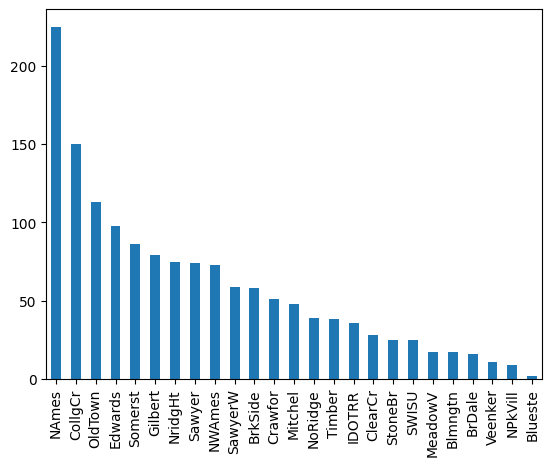

In [23]:
X['Neighborhood'].value_counts().plot(kind='bar')

In [24]:
X['Condition1'].value_counts()

Norm      1255
Feedr       80
Artery      48
RRAn        26
PosN        17
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [25]:

X['Condition2'].value_counts()

Norm      1439
Feedr        6
Artery       2
RRNn         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

In [26]:

X['SaleCondition'].value_counts()

Normal     1195
Partial     121
Abnorml     100
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [27]:
X['SaleType'].value_counts()

WD       1264
New       118
COD        43
ConLD       8
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [28]:
#Data Trasformation
print ("Original: \n")
print (X.value_counts(), "\n")

Original: 

Series([], dtype: int64) 



In [29]:
# Turn into one hot encoding
X['enc_street'] = pd.get_dummies(X.Street, drop_first=True)
y['enc_street'] = pd.get_dummies(X.Street, drop_first=True)

In [30]:
# Encoded
print ('Encoded: \n')
print (X.enc_street.value_counts())

Encoded: 

1    1447
0       5
Name: enc_street, dtype: int64


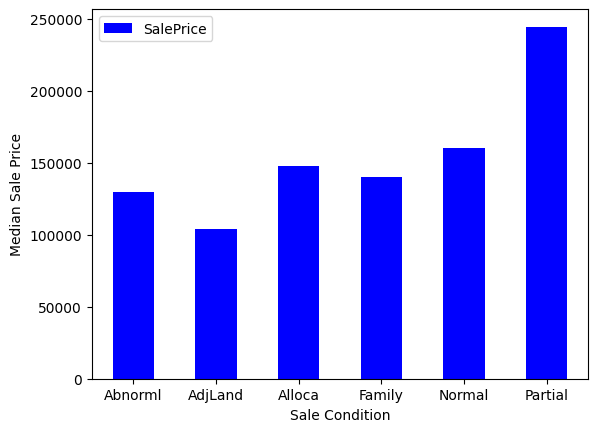

In [31]:
# Feature Engineering
condition_pivot = X.pivot_table(index='SaleCondition',
                                    values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

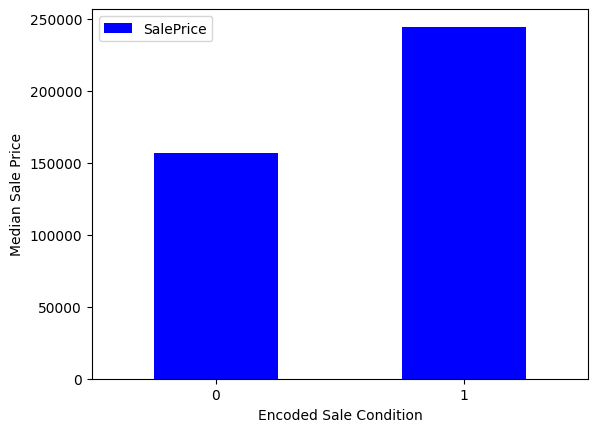

In [32]:
def encode(x): return 1 if x == 'Partial' else 0
X['enc_condition'] = X.SaleCondition.apply(encode)
y['enc_condition'] = y.SaleCondition.apply(encode)
condition_pivot = X.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [33]:
y

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Skewed_SP,enc_street,enc_condition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,MnPrv,NaN,0,6,2010,WD,Normal,12.247694,1.0,0
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,NaN,Gar2,12500,6,2010,WD,Normal,12.109011,1.0,0
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,MnPrv,NaN,0,3,2010,WD,Normal,12.317167,1.0,0
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,6,2010,WD,Normal,11.849398,1.0,0
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,NaN,NaN,0,1,2010,WD,Normal,12.429216,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,6,2006,WD,Normal,12.128111,1.0,0
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,4,2006,WD,Abnorml,12.072541,1.0,0
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,9,2006,WD,Abnorml,12.254863,1.0,0
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,MnPrv,Shed,700,7,2006,WD,Normal,12.493130,1.0,0


In [34]:
feats = y.select_dtypes(
        include=[np.number]).drop(['Id','Skewed_SP'], axis=1).interpolate()
feats

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,enc_street,enc_condition
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,120,0,0,6,2010,1.0,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,36,0,0,0,0,12500,6,2010,1.0,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,34,0,0,0,0,0,3,2010,1.0,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,36,0,0,0,0,0,6,2010,1.0,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,82,0,0,144,0,0,1,2010,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,0,0,0,6,2006,1.0,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,24,0,0,0,0,0,4,2006,1.0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,0,0,0,9,2006,1.0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,32,0,0,0,0,700,7,2006,1.0,0


In [35]:
#Interpolation of data
data = X.select_dtypes(include=[np.number]).interpolate().dropna()

In [36]:
sum(data.isnull().sum() != 0)

0

In [37]:
# Linear Model for the  train and test
target = np.log(X.SalePrice)
train= data.drop(['SalePrice','Skewed_SP', 'Id'], axis=1)

In [38]:
#Train Test Split.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    train, target, random_state=42, test_size=.33)

In [39]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,enc_street,enc_condition
497,50,60.000000,9120,7,6,1925,1950,0.0,329,0,...,100,0,0,0,0,0,6,2008,1,0
308,30,98.666667,12342,4,5,1940,1950,0.0,262,0,...,0,0,0,0,0,0,3,2009,1,0
461,70,60.000000,7200,7,9,1936,2007,0.0,350,210,...,0,0,0,0,0,0,4,2009,1,0
681,50,55.000000,4500,5,5,1932,2000,0.0,182,0,...,0,56,0,0,0,0,7,2009,1,0
781,60,65.000000,7153,6,5,1992,1992,0.0,387,0,...,124,0,0,0,0,0,7,2006,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100,30,60.000000,8400,2,5,1920,1950,0.0,290,0,...,0,0,0,0,0,0,1,2009,1,0
1135,30,60.000000,6180,6,5,1926,1950,0.0,0,0,...,128,0,0,0,0,0,5,2007,1,0
1302,60,92.000000,10120,8,5,1994,1994,391.0,740,0,...,78,0,0,0,0,0,12,2006,1,0
864,20,72.000000,8640,7,5,2007,2008,0.0,0,0,...,140,0,0,0,0,0,5,2008,1,1


In [40]:
X_test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,enc_street,enc_condition
1040,20,88.0,13125,5,4,1957,2000,67.0,168,682,...,0,0,0,0,0,0,1,2006,1,0
1129,90,60.0,7200,5,5,1980,1980,180.0,936,0,...,0,0,0,0,0,0,8,2007,1,0
1001,30,60.0,5400,5,6,1920,1950,0.0,0,0,...,20,94,0,0,0,0,1,2007,1,0
1324,20,75.0,9986,8,5,2006,2007,428.0,0,0,...,49,0,0,0,0,0,2,2007,1,1
530,80,85.0,10200,6,5,1988,1989,219.0,783,0,...,0,0,0,0,0,0,8,2008,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,20,91.0,14303,8,5,1994,1994,554.0,1314,0,...,36,0,0,0,0,0,8,2008,1,0
478,20,79.0,10637,8,5,2007,2008,336.0,1288,0,...,44,0,0,0,0,0,9,2009,1,0
758,160,24.0,2280,7,5,1999,1999,360.0,549,0,...,0,0,0,0,0,0,8,2008,1,0
553,20,67.0,8777,4,5,1949,2003,0.0,0,0,...,96,0,0,0,0,0,5,2009,1,0


In [41]:
from sklearn import linear_model
from sklearn import ensemble
lr = ensemble.GradientBoostingRegressor()
lr2 =  ensemble.RandomForestRegressor(n_estimators = 100, oob_score = True, n_jobs = -1,random_state =50,max_features = "sqrt", min_samples_leaf = 50)
lr3 = linear_model.LinearRegression()
lr4 = linear_model.TheilSenRegressor()
lr5 = linear_model.RANSACRegressor(random_state=50)
lr6 = linear_model.Lasso()

In [42]:
model = lr.fit(X_train, y_train)

In [43]:
print ("R^2 is: \n", model.score(X_test, y_test))
rsq1 = model.score(X_test, y_test)

R^2 is: 
 0.8912793943119743


In [44]:
predictions = model.predict(X_test)

In [45]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))
rmse1 = mean_squared_error(y_test, predictions)

RMSE is: 
 0.016800916379699125


In [46]:
from sklearn.metrics import mean_absolute_error
print("MAE is: \n", mean_absolute_error(y_test,predictions))
mae1 = mean_absolute_error(y_test,predictions)

MAE is: 
 0.08636464481495196


Text(0.5, 1.0, 'Gradient Boosting Regression Model')

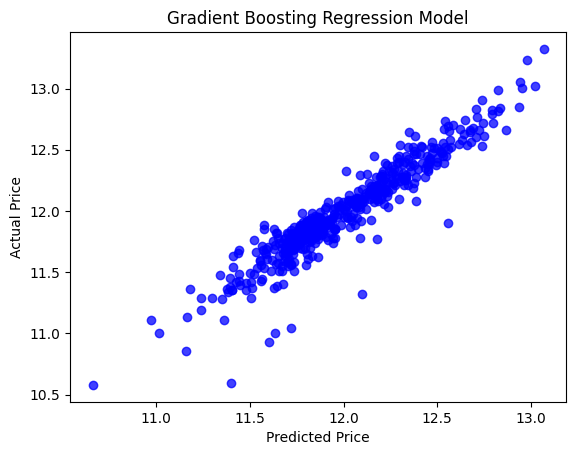

In [47]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Gradient Boosting Regression Model')

In [48]:

submission = pd.DataFrame()
submission['Id'] = id.id
submission

,Id
0,1461
1,1462
2,1463
3,1464
4,1465
...,...
1454,2915
1455,2916
1456,2917
1457,2918


In [49]:
predictions = model.predict(feats)

In [50]:
final_predictions = np.exp(predictions)

In [51]:
print ("Original predictions are: \n", predictions, "\n")
print ("Final predictions are: \n", final_predictions)

Original predictions are: 
 [11.74134318 11.93198657 12.14026435 ... 12.07390437 11.68415823
 12.44658797] 

Final predictions are: 
 [125661.01233191 152053.32592871 187262.06818817 ... 175238.70806658
 118676.69556184 254380.88414033]


In [52]:
submission['SalePrice1'] = final_predictions
submission.head()

,Id,SalePrice1
0,1461,125661.012332
1,1462,152053.325929
2,1463,187262.068188
3,1464,184706.016534
4,1465,183601.195566


In [53]:
final = pd.DataFrame()
final.index = ["RSquare","RMSE","MAE"]

In [54]:
list1 = [rsq1,rmse1,mae1]
final["Gradient Boosting Regression"] = list1
final

,Gradient Boosting Regression
RSquare,0.891279
RMSE,0.016801
MAE,0.086365


---->>>>>  Algo 2   **Random Forest Regressor**

In [55]:
model2 = lr2.fit(X_train, y_train)
rsq2 = model2.score(X_test, y_test)
predictions2 = model2.predict(X_test)
rmse2 = mean_squared_error(y_test, predictions2)
mae2 = mean_absolute_error(y_test,predictions2)
predictions2 = model2.predict(feats)
final_predictions2 = np.exp(predictions2)
submission['SalePrice2'] = final_predictions2
list2 = [rsq2,rmse2,mae2]
final["Random Forest Regression"] = list2
final


,Gradient Boosting Regression,Random Forest Regression
RSquare,0.891279,0.759706
RMSE,0.016801,0.037133
MAE,0.086365,0.126793


---->>>>> Algo 3 **Linear Regression**



In [56]:
model3 = lr3.fit(X_train, y_train)
rsq3 = model3.score(X_test, y_test)
predictions3 = model3.predict(X_test)
rmse3 = mean_squared_error(y_test, predictions3)
mae3 = mean_absolute_error(y_test,predictions3)
predictions3 = model3.predict(feats)
final_predictions3 = np.exp(predictions3)
submission['SalePrice3'] = final_predictions3
list3 = [rsq3,rmse3,mae3]
final["Linear Regression"] = list3
final

,Gradient Boosting Regression,Random Forest Regression,Linear Regression
RSquare,0.891279,0.759706,0.885357
RMSE,0.016801,0.037133,0.017716
MAE,0.086365,0.126793,0.090308


In [57]:
# pdata = pd.DataFrame()
# pdata = y_test
# pdata
# pred = model3.predict(X_test)
# pred

-------->>>>>>>    Algo 6 **Lasso Regression**

In [58]:
model6 = lr6.fit(X_train, y_train)
rsq6 = model6.score(X_test, y_test)
predictions6 = model6.predict(X_test)
rmse6 = mean_squared_error(y_test, predictions6)
mae6 = mean_absolute_error(y_test,predictions6)
predictions6 = model6.predict(feats)
final_predictions6 = np.exp(predictions6)
submission['SalePrice6'] = final_predictions6
list6 = [rsq6,rmse6,mae6]
final["Lasso Regression"] = list6
final

,Gradient Boosting Regression,Random Forest Regression,Linear Regression,Lasso Regression
RSquare,0.891279,0.759706,0.885357,0.797330
RMSE,0.016801,0.037133,0.017716,0.031319
MAE,0.086365,0.126793,0.090308,0.120196


---->>>>  Algo 7 **Decision Tree**

In [59]:
from sklearn.tree import DecisionTreeRegressor
tr_regressor = DecisionTreeRegressor(random_state=0)
model7 = tr_regressor.fit(X_train, y_train)
rsq7 = model7.score(X_test, y_test)
predictions7 = model7.predict(X_test)
rmse7 = mean_squared_error(y_test, predictions7)
mae7 = mean_absolute_error(y_test,predictions7)
predictions7 = model7.predict(feats)
final_predictions7 = np.exp(predictions7)
submission['SalePrice7'] = final_predictions7
list7 = [rsq7,rmse7,mae7]
final["Decision Tree"] = list7
final

,Gradient Boosting Regression,Random Forest Regression,Linear Regression,Lasso Regression,Decision Tree
RSquare,0.891279,0.759706,0.885357,0.797330,0.638444
RMSE,0.016801,0.037133,0.017716,0.031319,0.055872
MAE,0.086365,0.126793,0.090308,0.120196,0.160634


----->>>> Algo 8 **Support Vector Regression**

In [60]:
from sklearn.svm import SVR
lr8 = SVR(kernel = 'rbf')
model8 = lr8.fit(X_train, y_train)
rsq8 = model8.score(X_test, y_test)
predictions8 = model8.predict(X_test)
rmse8 = mean_squared_error(y_test, predictions8)
mae8 = mean_absolute_error(y_test,predictions8)
predictions8 = model8.predict(feats)
final_predictions8 = np.exp(predictions8)
submission['SalePrice8'] = final_predictions8
list8 = [rsq8,rmse8,mae8]
final["Support Vector Regression"] = list8
final

,Gradient Boosting Regression,Random Forest Regression,Linear Regression,Lasso Regression,Decision Tree,Support Vector Regression
RSquare,0.891279,0.759706,0.885357,0.797330,0.638444,0.731221
RMSE,0.016801,0.037133,0.017716,0.031319,0.055872,0.041535
MAE,0.086365,0.126793,0.090308,0.120196,0.160634,0.142916


In [61]:
final.to_csv('final_submission.csv', index=False)

In [62]:
submission.to_csv('Anand_houseprice_submission.csv', index=False)

**Saving the model:-**

In [63]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
# some time later...
# load the model from disk
loaded_model = pickle.load(open('/content/finalized_model.sav', 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8912793943119743
